In [ ]:
# This section goes through the process of creating 
# the code and contains all of our data tables and graphs 
# at the end. If you can add this section somewhere in between 
# the Metric and Best Neighborhood sections, I would greatly appreciate it.

## The Process

To begin, we need to import a lot of stuff, as well as read in our datasets.

In [49]:
import pandas as pd
import ssl
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

arrest_records = pd.read_csv("arrest-data.csv")
fire_records = pd.read_csv("fire-incident-data.csv")
population_records = pd.read_csv("population-density.csv")

To start, we'll look at the "arrest_records" dataframe, and then apply whatever transformations done there to the "fire_records" dataframe.

In [50]:
arrest_records.head(2)

PK       CCR   AGE GENDER RACE           ARRESTTIME  \
0  1975272  16158872  42.0      F    B  2016-08-24T12:20:00   
1  1974456  16144120  31.0      M    W  2016-08-03T14:55:00   

                                     ARRESTLOCATION  \
0         4700 Block Centre AV Pittsburgh, PA 15213   
1  4200 Block Steubenville PKE Pittsburgh, PA 15205   

                                       OFFENSES  \
0                            3929 Retail Theft.   
1  13(a)(16) Possession of Controlled Substance   

                                   INCIDENTLOCATION INCIDENTNEIGHBORHOOD  \
0         4700 Block Centre AV Pittsburgh, PA 15213           Bloomfield   
1  4200 Block Steubenville PKE Pittsburgh, PA 15205         Outside City   

  INCIDENTZONE  INCIDENTTRACT  COUNCIL_DISTRICT  PUBLIC_WORKS_DIVISION  \
0            5          804.0               8.0                    2.0   
1          OSC         5599.0               NaN                    NaN   

           X          Y  
0 -79.949277  40.452551  
1 -80.088018  40.440136

The "arrest_records" dataframe has each arrest indexed, and also includes the "INCIDENTNEIGHBORHOOD" column, which we want to count. We'll create Series "a" to store this data.

In [51]:
a = arrest_records["INCIDENTNEIGHBORHOOD"].value_counts()
a.head(5)

Central Business District    2131
South Side Flats             1953
Carrick                      1313
East Allegheny               1235
Homewood South               1138
Name: INCIDENTNEIGHBORHOOD, dtype: int64

Our goal at the end is to create a single dataframe that combines arrest, fire, and population data together, so we'll convert "a" into dataframe "df_a", while also adjusting column names and indexes:

In [52]:
df_a = pd.DataFrame(a)
df_a = df_a.rename(columns = {"INCIDENTNEIGHBORHOOD" : "Arrest Count"})
df_a = df_a.reset_index().rename(columns = {"index" : "Neighborhood"})
df_a.head(5)

Neighborhood  Arrest Count
0  Central Business District          2131
1           South Side Flats          1953
2                    Carrick          1313
3             East Allegheny          1235
4             Homewood South          1138

We apply the same transformations to the "fire_records" dataframe:

In [53]:
f = fire_records["neighborhood"].value_counts()
f.head(5)
df_f = pd.DataFrame(f)
df_f = df_f.rename(columns = {"neighborhood" : "Fire Count"})
df_f = df_f.reset_index().rename(columns = {"index" : "Neighborhood"})
df_f.head(5)

Neighborhood  Fire Count
0                    Carrick         220
1  Central Business District         186
2           South Side Flats         184
3                  Hazelwood         183
4        Squirrel Hill South         178

Now we can take a look at the "population_records" dataframe:

In [54]:
population_records.head(2)

Neighborhood  Sector # Pop. 1940 Pop. 1950 Pop. 1960 Pop. 1970  \
0  Allegheny Center         3     4,521     3,862     2,512       632   
1    Allegheny West         3     3,210     3,313     2,170     1,124   

  Pop. 1980 Pop. 1990 Pop. 2000 Pop. 2010          ...            \
0     1,586     1,262       886       933          ...             
1       820       654       508       462          ...             

  % Other (2010) % White (2010) % 2+ Races (2010)  \
0          0.64%         40.84%            0.0397   
1          0.65%         76.62%            0.0303   

  % Hispanic (of any race) (2010) % Pop. Age < 5 (2010)  \
0                           0.029                0.0419   
1                           0.028                0.0000   

  % Pop. Age 5-19 (2010)  % Pop. Age 20-34 (2010) % Pop. Age 35-59 (2010)  \
0                  0.217                   0.2757                  0.2243   
1                  0.000                   0.0837                  0.6820   

  % Pop. Age 60-74 (2010) % Pop. Age > 75 (2010)  
0                  0.1761                 0.0650  
1                  0.1255                 0.1088  

[2 rows x 34 columns]

Since this dataframe is already indexed by neighborhood, we'll just grab the "Neighborhood Column" and the "Pop. 2010" column for the most recent data. It should also be noted that the populations have a comma as a thousand-place separator, which we'll have to remove so that we can perform mathematical operations with this data:

In [55]:
df_p = population_records[["Neighborhood", "Pop. 2010"]]
df_p["Pop. 2010"] = df_p["Pop. 2010"].str.replace(',', '')
df_p["Pop. 2010"] = df_p["Pop. 2010"].astype(int)
df_p.head(5)

/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Neighborhood  Pop. 2010
0   Allegheny Center        933
1     Allegheny West        462
2          Allentown       2500
3          Arlington       1869
4  Arlington Heights        244

Now, we can merge our "df_a" and "df_f" together, and merge that dataframe with "df_p" into the extremely descriptive "df":

In [56]:
temp = pd.merge(df_a, df_f)
df = pd.merge(temp, df_p)
df.head(5)

Neighborhood  Arrest Count  Fire Count  Pop. 2010
0  Central Business District          2131         186       3629
1           South Side Flats          1953         184       6597
2                    Carrick          1313         220      10113
3             East Allegheny          1235          76       2136
4             Homewood South          1138         128       2344

Now that we have all of our data in one place, we can start assigning "scores" to each neighborhood based on arrest/fire count. Because each neighborhood has a different population, simply finding the neighborhood with the lowest arrest/fire count might not yield the "safest neighborhood", so we decided to calculate a score by dividing the arrest/fire count by population for each neighborhood, finding and incidence per capita. We'll start with the arrest safety score, and add that to the dataframe:

In [59]:
df["Arrest Safety Score"] = (df["Arrest Count"]/df["Pop. 2010"])
df = df.sort_values(by = ["Arrest Safety Score"], ascending = True)
df = df.reset_index(drop = True)
df.index = df.index + 1
df["Arrest Safety Rank"] = df.index
df.head(5)

Neighborhood  Arrest Count  Fire Count  Pop. 2010  \
1    Central Northside            23          94       2923   
2  Squirrel Hill North           151          96      11363   
3       Swisshelm Park            20          11       1361   
4        Regent Square            19           6        928   
5        North Oakland           223          92      10551   

   Arrest Safety Score  Arrest Safety Rank  
1             0.007869                   1  
2             0.013289                   2  
3             0.014695                   3  
4             0.020474                   4  
5             0.021135                   5

By sorting the values in ascending order, then assigning the index of each neighborhood, we can also determine a ranking for each neighborhood. However, our arrest safety scores came out as rather small numbers, so we applied some changes so that the score looks more appearling and a higher score reflects greater safety, simply by subtracting the score from 1, then multiplying the result by 100:

In [60]:
df["Arrest Safety Score"] = (1 - df["Arrest Count"]/df["Pop. 2010"]) * 100
df = df.sort_values(by = ["Arrest Safety Score"], ascending = False)
df = df.reset_index(drop = True)
df.index = df.index + 1
df["Arrest Safety Rank"] = df.index
df.head(5)

Neighborhood  Arrest Count  Fire Count  Pop. 2010  \
1    Central Northside            23          94       2923   
2  Squirrel Hill North           151          96      11363   
3       Swisshelm Park            20          11       1361   
4        Regent Square            19           6        928   
5        North Oakland           223          92      10551   

   Arrest Safety Score  Arrest Safety Rank  
1            99.213137                   1  
2            98.671126                   2  
3            98.530492                   3  
4            97.952586                   4  
5            97.886456                   5

For the purposes of graphing and assining future rankings, we'll drop the "Fire Count" column and put this edited dataframe into "dfa" while still retaining "df":

In [61]:
dfa = df.set_index(["Neighborhood"]).drop(["Fire Count"], axis = 1)
dfa.head(5)

Arrest Count  Pop. 2010  Arrest Safety Score  \
Neighborhood                                                        
Central Northside              23       2923            99.213137   
Squirrel Hill North           151      11363            98.671126   
Swisshelm Park                 20       1361            98.530492   
Regent Square                  19        928            97.952586   
North Oakland                 223      10551            97.886456   

                     Arrest Safety Rank  
Neighborhood                             
Central Northside                     1  
Squirrel Hill North                   2  
Swisshelm Park                        3  
Regent Square                         4  
North Oakland                         5

We apply the same transformations for our fire data, storing just fire data into "dff":

In [62]:
df["Fire Safety Score"] = (1 - df["Fire Count"]/df["Pop. 2010"]) * 100
df = df.sort_values(by = ["Fire Safety Score"], ascending = False)
df = df.reset_index(drop = True)
df.index = df.index + 1
df["Fire Safety Rank"] = df.index
dff = df.set_index(["Neighborhood"]).drop(["Arrest Count", "Arrest Safety Score", "Arrest Safety Rank"], axis = 1)
dff.head(5)

Fire Count  Pop. 2010  Fire Safety Score  Fire Safety Rank
Neighborhood                                                              
Regent Square            6        928          99.353448                 1
Westwood                21       3066          99.315068                 2
Morningside             26       3346          99.222953                 3
Swisshelm Park          11       1361          99.191771                 4
Highland Park           54       6395          99.155590                 5

Finally, we calculate a similar overall score by simply averaging the arrest/fire safety scores, then assining a ranking:

In [63]:
df["Overall Safety Score"] = df[["Arrest Safety Score", "Fire Safety Score"]].mean(axis = 1)
df = df.sort_values(by = ["Overall Safety Score"], ascending = False)
df = df.reset_index(drop = True)
df.index = df.index + 1
df["Overall Rank"] = df.index
df = df.set_index(["Neighborhood"])    
df.head(5)

Arrest Count  Fire Count  Pop. 2010  Arrest Safety Score  \
Neighborhood                                                                    
Squirrel Hill North           151          96      11363            98.671126   
Swisshelm Park                 20          11       1361            98.530492   
Regent Square                  19           6        928            97.952586   
North Oakland                 223          92      10551            97.886456   
Stanton Heights               115          43       4601            97.500543   

                     Arrest Safety Rank  Fire Safety Score  Fire Safety Rank  \
Neighborhood                                                                   
Squirrel Hill North                   2          99.155153                 6   
Swisshelm Park                        3          99.191771                 4   
Regent Square                         4          99.353448                 1   
North Oakland                         5          99.128045                 7   
Stanton Heights                       7          99.065421                 9   

                     Overall Safety Score  Overall Rank  
Neighborhood                                             
Squirrel Hill North             98.913139             1  
Swisshelm Park                  98.861132             2  
Regent Square                   98.653017             3  
North Oakland                   98.507250             4  
Stanton Heights                 98.282982             5

## The Data 

Since we have everything set up, let's take a look at the data we have gathered. We'll start with arrest data first:

#### Arrest Data

In [67]:
dfa.head(10)

Arrest Count  Pop. 2010  Arrest Safety Score  \
Neighborhood                                                        
Central Northside              23       2923            99.213137   
Squirrel Hill North           151      11363            98.671126   
Swisshelm Park                 20       1361            98.530492   
Regent Square                  19        928            97.952586   
North Oakland                 223      10551            97.886456   
New Homestead                  22        990            97.777778   
Stanton Heights               115       4601            97.500543   
Ridgemont                      13        483            97.308489   
Squirrel Hill South           439      15110            97.094639   
Lincoln Place                 101       3227            96.870158   

                     Arrest Safety Rank  
Neighborhood                             
Central Northside                     1  
Squirrel Hill North                   2  
Swisshelm Park                        3  
Regent Square                         4  
North Oakland                         5  
New Homestead                         6  
Stanton Heights                       7  
Ridgemont                             8  
Squirrel Hill South                   9  
Lincoln Place                        10

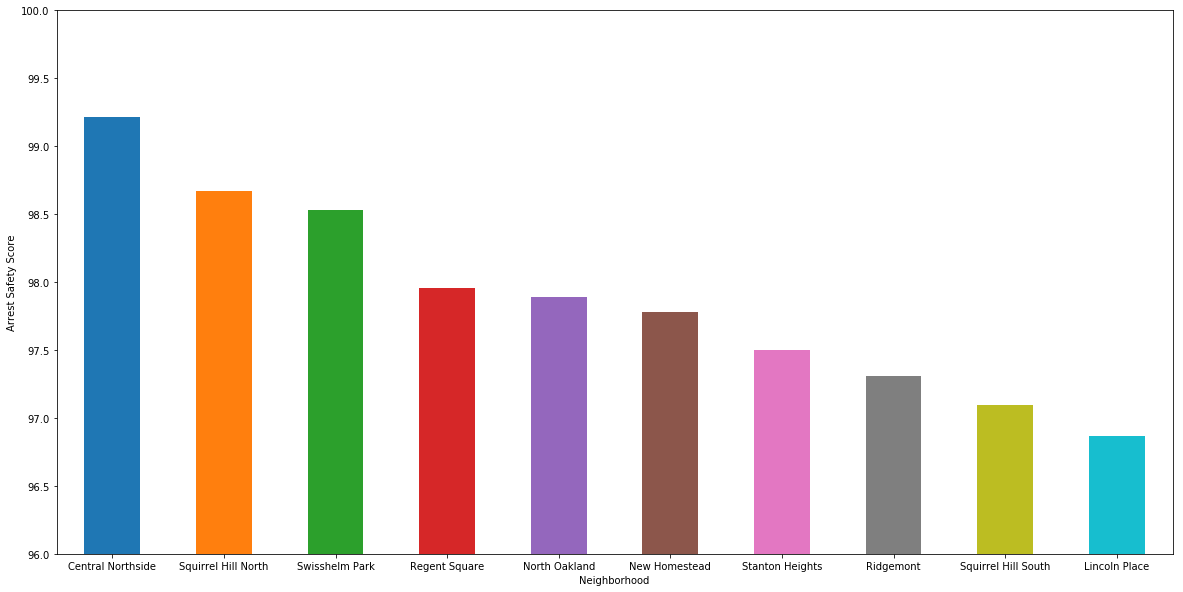

In [68]:
plt.figure(figsize = (20,10))
dfa["Arrest Safety Score"].head(10).plot(rot = 0, kind ='bar')
plt.xlabel("Neighborhood")
plt.ylabel("Arrest Safety Score");
plt.ylim(96,100)
plt.show()

It looks like Central Northside has the least amount of arrests per capita, and thus, has the highest arrest safety score. Squirrel Hill North and Swisshelm Park also have very high arrest safety scores.

#### Fire Data

In [69]:
dff.head(10)

Fire Count  Pop. 2010  Fire Safety Score  \
Neighborhood                                                    
Regent Square                 6        928          99.353448   
Westwood                     21       3066          99.315068   
Morningside                  26       3346          99.222953   
Swisshelm Park               11       1361          99.191771   
Highland Park                54       6395          99.155590   
Squirrel Hill North          96      11363          99.155153   
North Oakland                92      10551          99.128045   
Shadyside                   125      13915          99.101689   
Stanton Heights              43       4601          99.065421   
Duquesne Heights             23       2425          99.051546   

                     Fire Safety Rank  
Neighborhood                           
Regent Square                       1  
Westwood                            2  
Morningside                         3  
Swisshelm Park                      4  
Highland Park                       5  
Squirrel Hill North                 6  
North Oakland                       7  
Shadyside                           8  
Stanton Heights                     9  
Duquesne Heights                   10

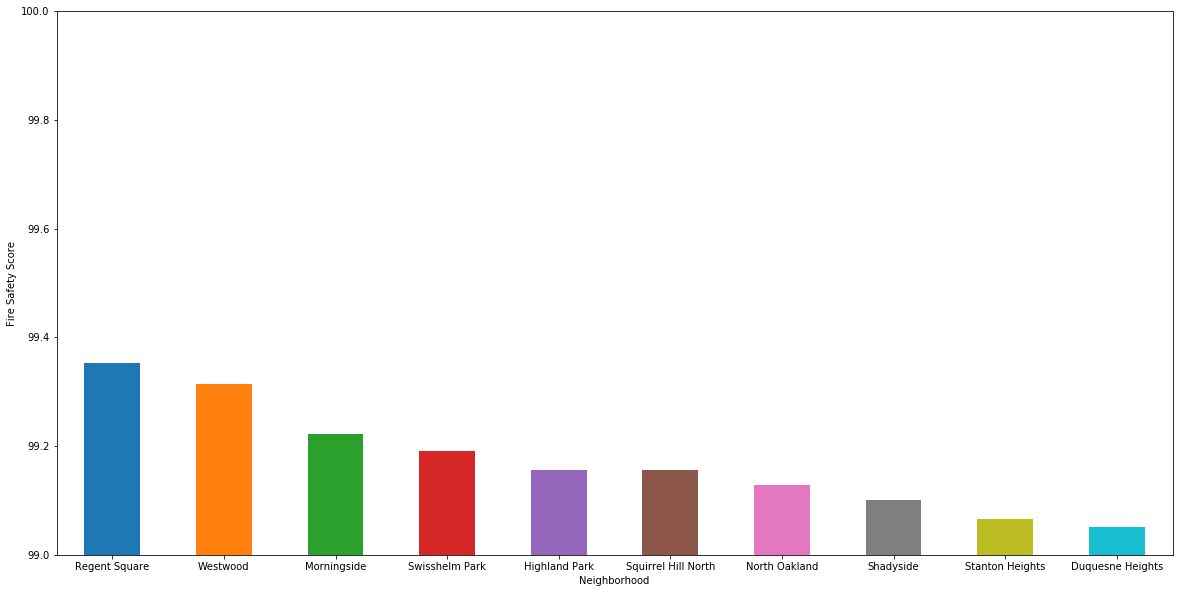

In [70]:
plt.figure(figsize = (20,10))
dff["Fire Safety Score"].head(10).plot(rot = 0, kind ='bar')
plt.xlabel("Neighborhood")
plt.ylabel("Fire Safety Score");
plt.ylim(99,100)
plt.show()

Here, Regent Square has the highest fire safety score. Swisshelm Park and Squirrel Hill North, which were in the top 3 for arrest safety, also rank in the top 10 for fire safety. 

#### Overall Data

And now, we'll look at the overall safety score to determine the best neighborhood:

In [72]:
df.head(10)

Arrest Count  Fire Count  Pop. 2010  Arrest Safety Score  \
Neighborhood                                                                    
Squirrel Hill North           151          96      11363            98.671126   
Swisshelm Park                 20          11       1361            98.530492   
Regent Square                  19           6        928            97.952586   
North Oakland                 223          92      10551            97.886456   
Stanton Heights               115          43       4601            97.500543   
Central Northside              23          94       2923            99.213137   
Squirrel Hill South           439         178      15110            97.094639   
Morningside                   111          26       3346            96.682606   
New Homestead                  22          20        990            97.777778   
Lincoln Place                 101          44       3227            96.870158   

                     Arrest Safety Rank  Fire Safety Score  Fire Safety Rank  \
Neighborhood                                                                   
Squirrel Hill North                   2          99.155153                 6   
Swisshelm Park                        3          99.191771                 4   
Regent Square                         4          99.353448                 1   
North Oakland                         5          99.128045                 7   
Stanton Heights                       7          99.065421                 9   
Central Northside                     1          96.784126                65   
Squirrel Hill South                   9          98.821972                19   
Morningside                          11          99.222953                 3   
New Homestead                         6          97.979798                43   
Lincoln Place                        10          98.636504                25   

                     Overall Safety Score  Overall Rank  
Neighborhood                                             
Squirrel Hill North             98.913139             1  
Swisshelm Park                  98.861132             2  
Regent Square                   98.653017             3  
North Oakland                   98.507250             4  
Stanton Heights                 98.282982             5  
Central Northside               97.998632             6  
Squirrel Hill South             97.958306             7  
Morningside                     97.952779             8  
New Homestead                   97.878788             9  
Lincoln Place                   97.753331            10

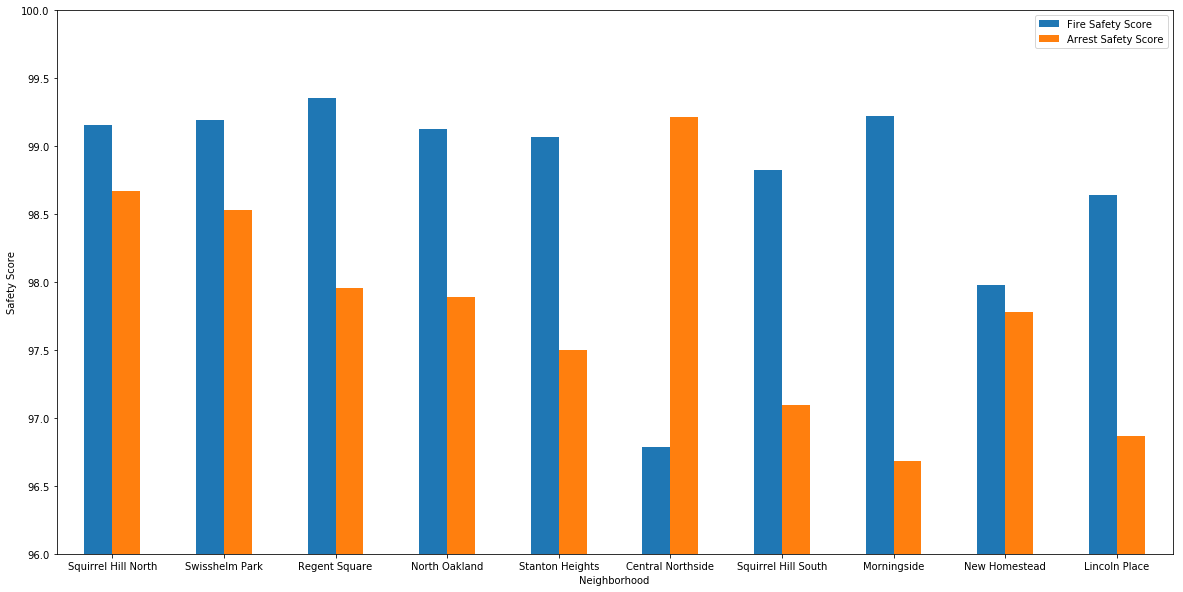

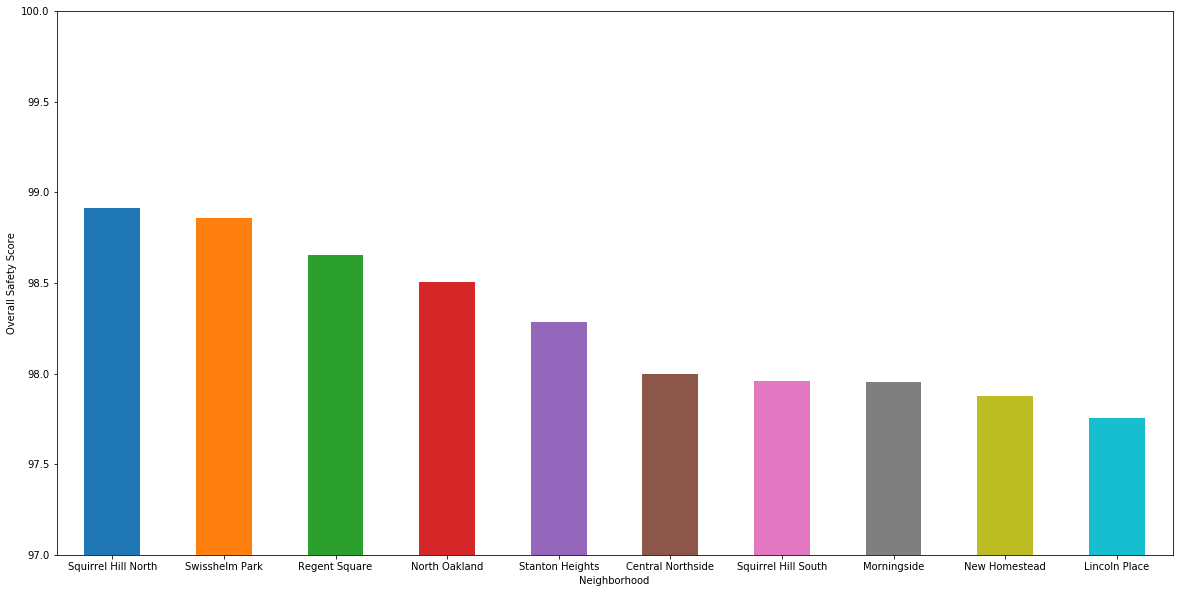

In [73]:
df[["Fire Safety Score", "Arrest Safety Score"]].head(10).plot(rot = 0, kind ='bar')
plt.xlabel("Neighborhood")
plt.ylabel("Safety Score");
plt.ylim(96,100)
plt.gcf().set_size_inches(20, 10)
plt.show()

plt.figure(figsize = (20,10))
df["Overall Safety Score"].head(10).plot(rot = 0, kind ='bar')
plt.xlabel("Neighborhood")
plt.ylabel("Overall Safety Score");
plt.ylim(97,100)
plt.show()

In addition to the top 10 overall safety score neighborhoods, we also have those same neighborhoods with both their arrest and fire safety scores graphed side by side. And with the data thusly presented, we can conclude that the best neighborhood in Pittsburgh is...